In [66]:
# ============================================================
# CELL 1: IMPORT LIBRARY
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

print("Library berhasil dimuat")


Library berhasil dimuat


In [67]:
# ============================================================
# CELL 2: FUNGSI FUZZY C-MEANS (TANPA LIBRARY)
# ============================================================

def initialize_membership(n_samples, n_clusters):
    """Inisialisasi membership matrix secara random"""
    U = np.random.rand(n_samples, n_clusters)
    U /= np.sum(U, axis=1, keepdims=True)
    return U


def compute_centroids(X, U, m):
    """Hitung centroid berdasarkan membership matrix"""
    Um = U ** m
    return (Um.T @ X) / np.sum(Um.T, axis=1, keepdims=True)


def update_membership(X, C, m):
    """Update membership matrix berdasarkan jarak ke centroid"""
    n_samples = X.shape[0]
    n_clusters = C.shape[0]
    U_new = np.zeros((n_samples, n_clusters))

    for i in range(n_samples):
        for j in range(n_clusters):
            denom = 0
            dist_ij = np.linalg.norm(X[i] - C[j]) + 1e-10

            for k in range(n_clusters):
                dist_ik = np.linalg.norm(X[i] - C[k]) + 1e-10
                denom += (dist_ij / dist_ik) ** (2 / (m - 1))

            U_new[i, j] = 1 / denom

    return U_new


def fuzzy_c_means(X, n_clusters=2, m=2.0, max_iter=200, error=1e-5):
    """
    Fuzzy C-Means Clustering

    Parameters:
    - X: Data matrix (n_samples, n_features)
    - n_clusters: Jumlah cluster
    - m: Fuzziness parameter (biasanya 2.0)
    - max_iter: Maksimum iterasi
    - error: Threshold konvergensi

    Returns:
    - C: Centroids
    - U: Membership matrix
    """
    U = initialize_membership(X.shape[0], n_clusters)

    for iteration in range(max_iter):
        C = compute_centroids(X, U, m)
        U_new = update_membership(X, C, m)

        # Cek konvergensi
        if np.linalg.norm(U_new - U) < error:
            print(f"Konvergen pada iterasi {iteration+1}")
            break

        U = U_new

    return C, U


def predict_cluster(X_test, C, m=2.0):
    """Prediksi cluster untuk data baru berdasarkan centroid yang sudah ada"""
    n_samples = X_test.shape[0]
    n_clusters = C.shape[0]
    U_pred = np.zeros((n_samples, n_clusters))

    for i in range(n_samples):
        for j in range(n_clusters):
            denom = 0
            dist_ij = np.linalg.norm(X_test[i] - C[j]) + 1e-10

            for k in range(n_clusters):
                dist_ik = np.linalg.norm(X_test[i] - C[k]) + 1e-10
                denom += (dist_ij / dist_ik) ** (2 / (m - 1))

            U_pred[i, j] = 1 / denom

    return np.argmax(U_pred, axis=1), U_pred

print("Fungsi FCM berhasil didefinisikan")

Fungsi FCM berhasil didefinisikan


In [68]:
# ============================================================
# CELL 3: LOAD DAN PREPROCESSING DATA
# ============================================================

# Load dataset
df = pd.read_csv("cmeans1.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Hapus kolom non-numerik
df_clean = df.drop(columns=["id", "diagnosis"], errors="ignore")
print(f"Shape setelah drop ID & diagnosis: {df_clean.shape}")

# Konversi ke numpy array
X = df_clean.values.astype(float)

# Normalisasi menggunakan Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(f"Data shape: {X_normalized.shape}")
print("Data berhasil dinormalisasi")

Dataset shape: (569, 30)
Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Shape setelah drop ID & diagnosis: (569, 30)
Data shape: (569, 30)
Data berhasil dinormalisasi


In [69]:
print("\n=== 10 Data Pertama X ===")
print(X[:10])

print("\n=== Nilai Unik Data ===")
print(np.unique(X, axis=0))



=== 10 Data Pertama X ===
[[1.799e+03 1.038e+03 1.228e+03 1.001e+03 1.184e+03 2.776e+03 3.001e+03
  1.471e+03 2.419e+03 7.871e+03 1.095e+03 9.053e+03 8.589e+03 1.534e+03
  6.399e+03 4.904e+03 5.373e+03 1.587e+03 3.003e+03 6.193e+03 2.538e+03
  1.733e+03 1.846e+03 2.019e+03 1.622e+03 6.656e+03 7.119e+03 2.654e+03
  4.601e+03 1.189e+03]
 [2.057e+03 1.777e+03 1.329e+03 1.326e+03 8.474e+03 7.864e+03 8.690e+02
  7.017e+03 1.812e+03 5.667e+03 5.435e+03 7.339e+03 3.398e+03 7.408e+03
  5.225e+03 1.308e+03 1.860e+02 1.340e+02 1.389e+03 3.532e+03 2.499e+03
  2.341e+03 1.588e+03 1.956e+03 1.238e+03 1.866e+03 2.416e+03 1.860e+02
  2.750e+02 8.902e+03]
 [1.969e+03 2.125e+03 1.300e+02 1.203e+03 1.096e+03 1.599e+03 1.974e+03
  1.279e+03 2.069e+03 5.999e+03 7.456e+03 7.869e+03 4.585e+03 9.403e+03
  6.150e+02 4.006e+03 3.832e+03 2.058e+03 2.250e+02 4.571e+03 2.357e+03
  2.553e+03 1.525e+03 1.709e+03 1.444e+03 4.245e+03 4.504e+03 2.430e+02
  3.613e+03 8.758e+03]
 [1.142e+03 2.038e+03 7.758e+03 3.861e+0

In [70]:
# ============================================================
# CELL 4: SPLIT DATA MENJADI TRAINING DAN TESTING
# ============================================================

# Bagi dataset menjadi 2 bagian sama rata
half = len(X_normalized) // 2
X_A = X_normalized[:half]  # Dataset Training
X_B = X_normalized[half:]  # Dataset Testing

print(f"Dataset Training (A): {X_A.shape}")
print(f"Dataset Testing (B): {X_B.shape}")


Dataset Training (A): (284, 30)
Dataset Testing (B): (285, 30)


In [71]:
# ============================================================
# CELL 5: TRAINING FUZZY C-MEANS PADA DATASET A
# ============================================================

n_clusters = 2  # Ganti sesuai kebutuhan (bisa 2, 3, atau 4)
m_fuzziness = 2.0

print(f"\nTraining FCM dengan {n_clusters} cluster...\n")

C, U_A = fuzzy_c_means(X_A, n_clusters=n_clusters, m=m_fuzziness, max_iter=200)

# Hard clustering (ambil cluster dengan membership tertinggi)
cluster_A = np.argmax(U_A, axis=1)

print("\nCentroid:")
print(C)
print(f"\nCluster aktif di Dataset A: {np.unique(cluster_A)}")
print(f"Distribusi cluster A:\n{pd.Series(cluster_A).value_counts().sort_index()}")


Training FCM dengan 2 cluster...

Konvergen pada iterasi 28

Centroid:
[[0.19418621 0.45539419 0.5016705  0.41625972 0.4962682  0.37862069
  0.32397793 0.41222531 0.5729479  0.57577304 0.35535159 0.38042193
  0.28143854 0.31724333 0.49950793 0.31567391 0.30362899 0.31224545
  0.20061175 0.32169761 0.18113205 0.47341921 0.39683353 0.40448705
  0.17041035 0.31726739 0.36065973 0.32713206 0.40345812 0.6000686 ]
 [0.19418606 0.45539373 0.50167305 0.41625987 0.49627036 0.37862274
  0.32397864 0.41222384 0.57294721 0.57577282 0.35535034 0.38042241
  0.28143757 0.31724236 0.49950792 0.31567351 0.30362837 0.31224683
  0.20061164 0.32169706 0.18113173 0.47341862 0.3968362  0.40448819
  0.17041045 0.31726686 0.36065908 0.32713367 0.40345783 0.60006944]]

Cluster aktif di Dataset A: [0 1]
Distribusi cluster A:
0    143
1    141
Name: count, dtype: int64


In [72]:
# ============================================================
# CELL 6: PREDIKSI CLUSTER PADA DATASET B + CENTROID
# ============================================================

print(f"\nPrediksi cluster untuk Dataset B...\n")

# ============================================================
# PERTAMA, PREDIKSI CLUSTER DAN MEMBERSHIP PADA DATASET B MENGGUNAKAN CENTROID DARI DATASET A
# ============================================================
cluster_B, U_B = predict_cluster(X_B, C, m=m_fuzziness)

# ============================================================
# KEMUDIAN, HITUNG CENTROID BARU BERDASARKAN DATASET B DAN U_B YANG BARU DIDAPATKAN
# ============================================================
C_B = compute_centroids(X_B, U_B, m_fuzziness)

print("\n=== Centroid untuk Dataset B ===")
for idx, centroid in enumerate(C_B):
    print(f"Centroid {idx}: {centroid}")

print(f"Cluster aktif di Dataset B: {np.unique(cluster_B)}")
print(f"\nDistribusi cluster B:\n{pd.Series(cluster_B).value_counts().sort_index()}")



Prediksi cluster untuk Dataset B...


=== Centroid untuk Dataset B ===
Centroid 0: [0.18607073 0.44304019 0.6035242  0.41165021 0.57940157 0.4195286
 0.31473481 0.32847297 0.5552062  0.58748914 0.30463667 0.32898285
 0.26134703 0.27858517 0.52812873 0.30675537 0.3358689  0.36634791
 0.18169276 0.32357373 0.168568   0.46341749 0.51425535 0.45573682
 0.18872695 0.29453241 0.30827481 0.3778337  0.3734841  0.65174548]
Centroid 1: [0.18607044 0.44304    0.60352596 0.4116505  0.579403   0.41952978
 0.31473521 0.32847227 0.55520591 0.58748897 0.30463598 0.32898293
 0.26134634 0.2785844  0.52812875 0.30675526 0.33586838 0.36634909
 0.18169264 0.32357337 0.1685677  0.46341722 0.5142571  0.45573767
 0.18872705 0.29453191 0.30827426 0.37783491 0.373484   0.65174587]
Cluster aktif di Dataset B: [0 1]

Distribusi cluster B:
0     85
1    200
Name: count, dtype: int64


In [73]:
df_A = pd.DataFrame(X_A, columns=df_clean.columns)
df_B = pd.DataFrame(X_B, columns=df_clean.columns)

print(df_A.head())
print(df_A.describe())
print(df_A.dtypes)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.180899      0.261059        0.117736   0.083605         0.118347   
1     0.206973      0.450013        0.127943   0.116741         0.847639   
2     0.198080      0.538993        0.006771   0.104201         0.109544   
3     0.114502      0.516748        0.777665   0.375204         0.142457   
4     0.204144      0.362311        0.130167   0.113785         0.100240   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.278140        0.301124             0.147676       0.831371   
1          0.789035        0.087196             0.704447       0.621191   
2          0.159956        0.198073             0.128401       0.710180   
3          0.284466        0.242224             0.105612       0.893006   
4          0.132744        0.019868             0.104708       0.620152   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [74]:
print(df_B.head())
print(df_B.describe())
print(df_B.dtypes)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.129358      0.035796        0.843355   0.508259         0.782013   
1     0.126225      0.042700        0.800404   0.031403         0.839536   
2     0.119757      0.526464        0.780596   0.026509         0.860744   
3     0.129358      0.331117        0.821223   0.507545         0.695678   
4     0.112885      0.506009        0.738656   0.383361         0.080132   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.095592        0.111880             0.034033       0.489612   
1          0.422733        0.018663             0.293545       0.581371   
2          0.100914        0.659643             0.380584       0.543629   
3          0.373833        0.022677             0.117558       0.456717   
4          0.117984        0.930564             0.560988       0.892313   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [75]:
print("\nCentroid:")
print(C)

print("\nJarak antar centroid:")
print(np.linalg.norm(C[0] - C[1]))



Centroid:
[[0.19418621 0.45539419 0.5016705  0.41625972 0.4962682  0.37862069
  0.32397793 0.41222531 0.5729479  0.57577304 0.35535159 0.38042193
  0.28143854 0.31724333 0.49950793 0.31567391 0.30362899 0.31224545
  0.20061175 0.32169761 0.18113205 0.47341921 0.39683353 0.40448705
  0.17041035 0.31726739 0.36065973 0.32713206 0.40345812 0.6000686 ]
 [0.19418606 0.45539373 0.50167305 0.41625987 0.49627036 0.37862274
  0.32397864 0.41222384 0.57294721 0.57577282 0.35535034 0.38042241
  0.28143757 0.31724236 0.49950792 0.31567351 0.30362837 0.31224683
  0.20061164 0.32169706 0.18113173 0.47341862 0.3968362  0.40448819
  0.17041045 0.31726686 0.36065908 0.32713367 0.40345783 0.60006944]]

Jarak antar centroid:
6.183685385212185e-06


In [76]:
import pandas as pd

pd.Series(cluster_A).value_counts()


,count
0,143
1,141



=== FCM pada Dataset A ===
Konvergen pada iterasi 30

=== Membership 10 Sample Pertama (Dataset A) ===
Sample 0: Cluster 0=0.5000, Cluster 1=0.5000
Sample 1: Cluster 0=0.5000, Cluster 1=0.5000
Sample 2: Cluster 0=0.5000, Cluster 1=0.5000
Sample 3: Cluster 0=0.5000, Cluster 1=0.5000
Sample 4: Cluster 0=0.5000, Cluster 1=0.5000
Sample 5: Cluster 0=0.5000, Cluster 1=0.5000
Sample 6: Cluster 0=0.5000, Cluster 1=0.5000
Sample 7: Cluster 0=0.5000, Cluster 1=0.5000
Sample 8: Cluster 0=0.5000, Cluster 1=0.5000
Sample 9: Cluster 0=0.5000, Cluster 1=0.5000

=== FCM pada Dataset B ===
Konvergen pada iterasi 22

=== Membership 10 Sample Pertama (Dataset B) ===
Sample 0: Cluster 0=0.5000, Cluster 1=0.5000
Sample 1: Cluster 0=0.5000, Cluster 1=0.5000
Sample 2: Cluster 0=0.5000, Cluster 1=0.5000
Sample 3: Cluster 0=0.5000, Cluster 1=0.5000
Sample 4: Cluster 0=0.5000, Cluster 1=0.5000
Sample 5: Cluster 0=0.5000, Cluster 1=0.5000
Sample 6: Cluster 0=0.5000, Cluster 1=0.5000
Sample 7: Cluster 0=0.5000,

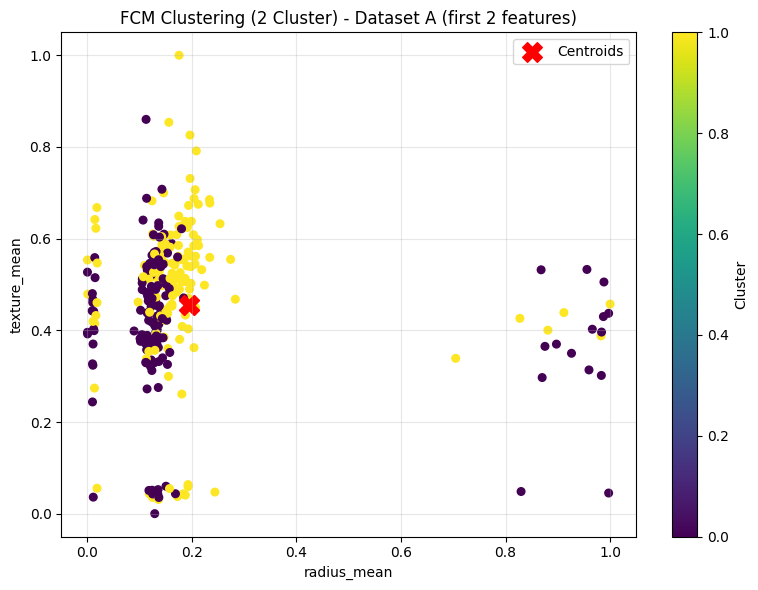

In [77]:
# ============================================================
# CELL 7: TAMPILKAN MEMBERSHIP 10 SAMPLE PERTAMA
# ============================================================
import numpy as np

# ============================================================
# JALANKAN FCM UNTUK DATASET A
# ============================================================
print("\n=== FCM pada Dataset A ===")
C_A, U_A = fuzzy_c_means(X_A, n_clusters=2)

print("\n=== Membership 10 Sample Pertama (Dataset A) ===")
for i in range(10):
    print(f"Sample {i}: Cluster 0={U_A[i,0]:.4f}, Cluster 1={U_A[i,1]:.4f}")

# ============================================================
# JALANKAN FCM UNTUK DATASET B
# ============================================================
print("\n=== FCM pada Dataset B ===")
C_B, U_B = fuzzy_c_means(X_B, n_clusters=2)

print("\n=== Membership 10 Sample Pertama (Dataset B) ===")
for i in range(10):
    print(f"Sample {i}: Cluster 0={U_B[i,0]:.4f}, Cluster 1={U_B[i,1]:.4f}")

# ============================================================
# VISUALISASI HASIL CLUSTERING
# ============================================================

labels_A = np.argmax(U_A, axis=1)

plt.figure(figsize=(8, 6))
scatter_A = plt.scatter(X_A[:,0], X_A[:,1], c=labels_A, cmap='viridis', s=30)
plt.scatter(C_A[:,0], C_A[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(df_clean.columns[0]) # Use the first feature name for x-axis
plt.ylabel(df_clean.columns[1]) # Use the second feature name for y-axis
plt.title("FCM Clustering (2 Cluster) - Dataset A (first 2 features)")
plt.colorbar(scatter_A, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [78]:
# ============================================================
# CELL 8: MENGAMBIL KOLOM NUMERIK UNTUK DATA A & B
# ============================================================

import pandas as pd
import numpy as np

# Load data A dan B
df_A = pd.read_csv("/content/dataset_training_cluster.csv")
df_B = pd.read_csv("/content/dataset_testing_cluster_membership.csv")

# Hanya ambil kolom numerik
df_A = df_A.select_dtypes(include=[np.number])
df_B = df_B.select_dtypes(include=[np.number])

X_A = df_A.values
X_B = df_B.values

print("Shape Dataset A:", X_A.shape)
print("Shape Dataset B:", X_B.shape)


Shape Dataset A: (284, 33)
Shape Dataset B: (285, 33)


In [79]:
# ============================================================
# CELL 9: MENYIMPAN KOLOM MEMBERSHIP
# ============================================================
df_A_to_save = df_A.copy()

# Hard cluster
cluster_A_from_U = np.argmax(U_A, axis=1)
df_A_to_save['cluster'] = cluster_A_from_U

# Tambahkan kolom membership sesuai jumlah cluster sebenarnya
for i in range(U_A.shape[1]):
    df_A_to_save[f'membership_cluster_{i}'] = U_A[:, i]

df_A_to_save.to_csv("dataset_training_cluster.csv", index=False)
print("File dataset_training_cluster.csv berhasil disimpan!")


File dataset_training_cluster.csv berhasil disimpan!


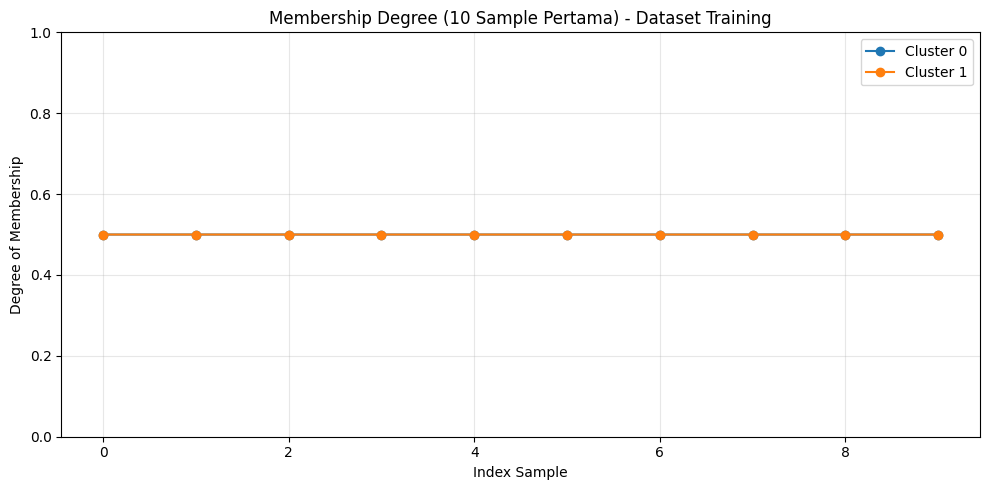

In [80]:
# ============================================================
# CELL 10: VISUALISASI MEMBERSHIP (10 SAMPLE)
# ============================================================

samples_to_show = min(10, len(U_A))

plt.figure(figsize=(10, 5))
for i in range(n_clusters):
    plt.plot(U_A[:samples_to_show, i], label=f"Cluster {i}", marker='o')

plt.title("Membership Degree (10 Sample Pertama) - Dataset Training")
plt.xlabel("Index Sample")
plt.ylabel("Degree of Membership")
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

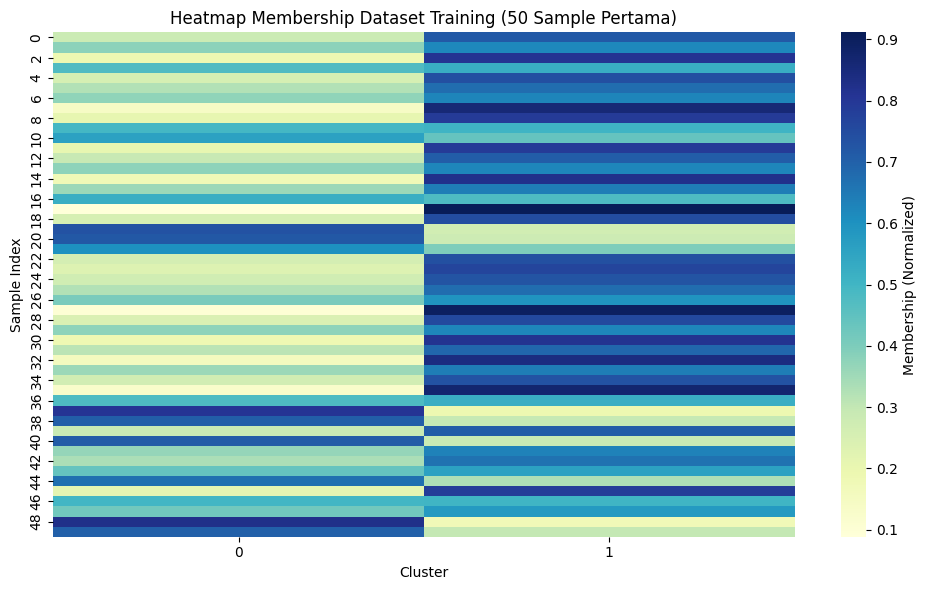

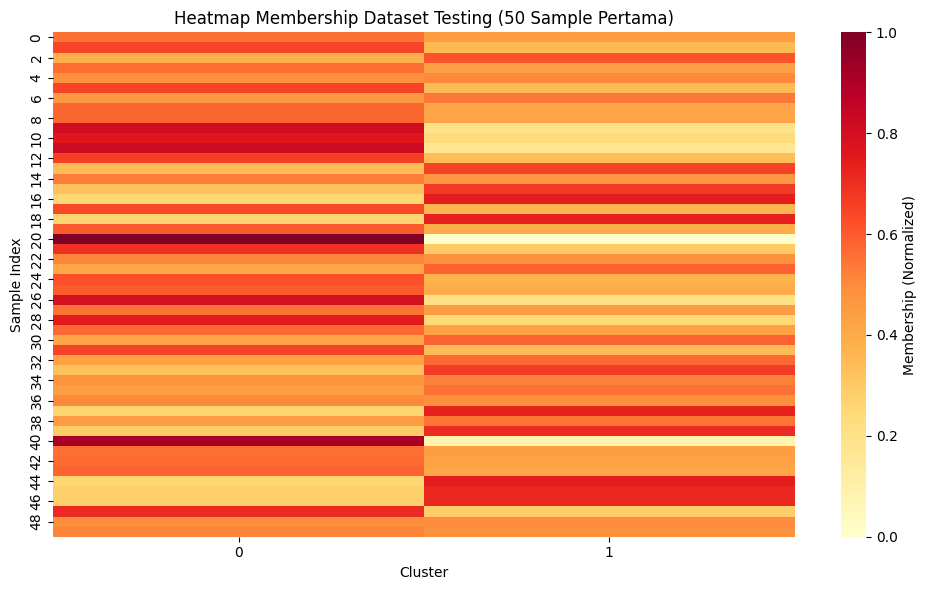

In [81]:
# ============================================================
# CELL 11: VISUALISASI HEATMAP MEMBERSHIP
# ============================================================

# Normalisasi untuk visualisasi lebih jelas
U_A_norm = (U_A - U_A.min()) / (U_A.max() - U_A.min())
U_B_norm = (U_B - U_B.min()) / (U_B.max() - U_B.min())

plt.figure(figsize=(10, 6))
sns.heatmap(U_A_norm[:50], cmap="YlGnBu", cbar_kws={'label': 'Membership (Normalized)'})
plt.title("Heatmap Membership Dataset Training (50 Sample Pertama)")
plt.xlabel("Cluster")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(U_B_norm[:50], cmap="YlOrRd", cbar_kws={'label': 'Membership (Normalized)'})
plt.title("Heatmap Membership Dataset Testing (50 Sample Pertama)")
plt.xlabel("Cluster")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()



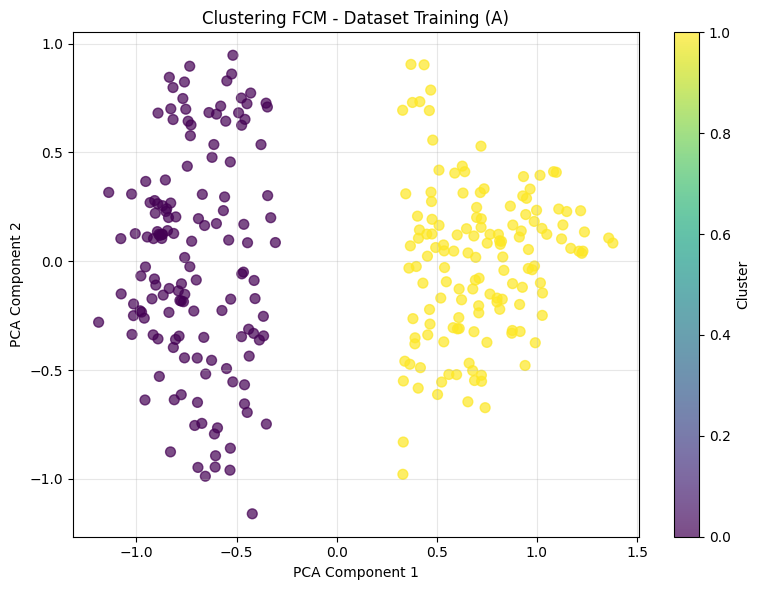

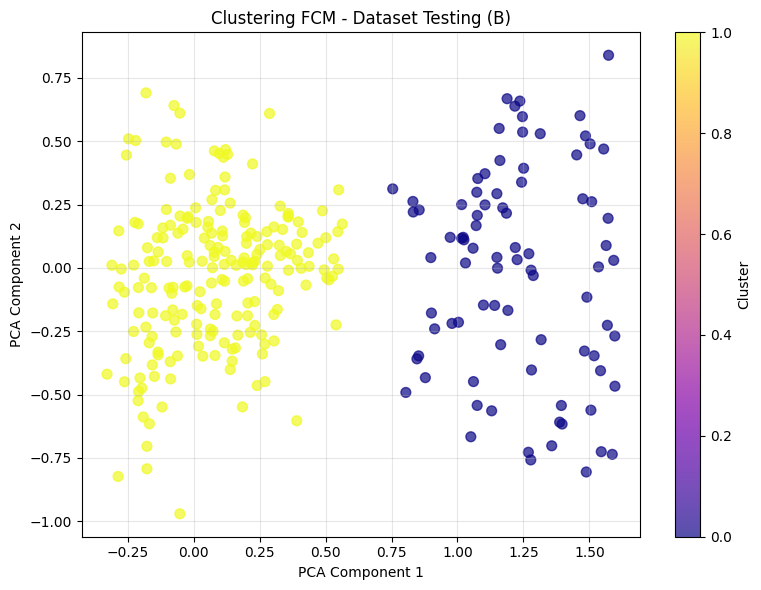


Semua proses selesai!


In [82]:
# ============================================================
# CELL 12: VISUALISASI CLUSTERING DENGAN PCA
# ============================================================

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
A_2d = pca.fit_transform(X_A)
B_2d = pca.transform(X_B)

# Plot Dataset A (Training)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(A_2d[:, 0], A_2d[:, 1], c=cluster_A, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("Clustering FCM - Dataset Training (A)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot Dataset B (Testing)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(B_2d[:, 0], B_2d[:, 1], c=cluster_B, cmap='plasma', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("Clustering FCM - Dataset Testing (B)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSemua proses selesai!")